In [2]:
import pandas as pd
import json

# Load the JSON data
with open('NY_NMAH_1.json', 'r') as file:
    data = json.load(file)

# Convert JSON data to DataFrame
df = pd.DataFrame(data)

# Normalize the 'freetext' column to extract the first values
freetext_df = pd.json_normalize(df['freetext'])

# Combine the original DataFrame with the normalized 'freetext' DataFrame
df_combined = pd.concat([df.drop(columns=['freetext']), freetext_df], axis=1)

# Display the combined DataFrame
df_combined.head()

,id,title,date,name,objectType,physicalDescription,place,setName,topic
0,ld1-1643399414441-1643399445553-0,Castle Home Pasteurizer,1883-1903,[Wilmot Castle Co.],"[sterilizer, bottle, baby, pasteurizer, infant...","[glass, ?, transparent (bottles(6) material), ...","[United States: New York, Rochester]","[Medicine and Science: Medicine, Health & Medi...","[Infant Feeding, Infant Nutrition, Infant Care]"
1,ld1-1643399055209-1643399067778-0,"Watch movement, E. Howard & Co.",before 1881,"[Howard, E.]",[watch movement],[overall: 3/8 in x 1 7/8 in; .9525 cm x 4.7625...,NaN,"[Work and Industry: Mechanisms, Measuring & Ma...",NaN
2,ld1-1643398986850-1643398988865-0,"Psychological Test Score Sheet, Wechsler-Bellv...",1940,"[Wechsler, David]",[Psychological Test Score Sheet],"[paper (overall material), overall: .1 cm x 21...",NaN,"[Medicine and Science: Mathematics, Science & ...","[Mathematics, Psychological Tests]"
3,ld1-1643399625297-1643399666530-0,Vernier Compass with Telescope,,[W. & L. E. Gurley],"[compass (pocket with telescope), Patent Model]","[overall: 5 3/4 in; 14.605 cm, needle: 4 1/2 i...","[United States: New York, Troy]","[Medicine and Science: Physical Sciences, Surv...",NaN
4,ld1-1643398775873-1643398780874-0,Burdock Blood Bitters,ca 1935,NaN,"[otc preparation, Drugs]","[burdock root (drug active ingredients), yello...","[United States: New York, Buffalo]","[Medicine and Science: Medicine, Health & Medi...","[Indigestion & Nausea Drugs, Tonics, Minerals ..."


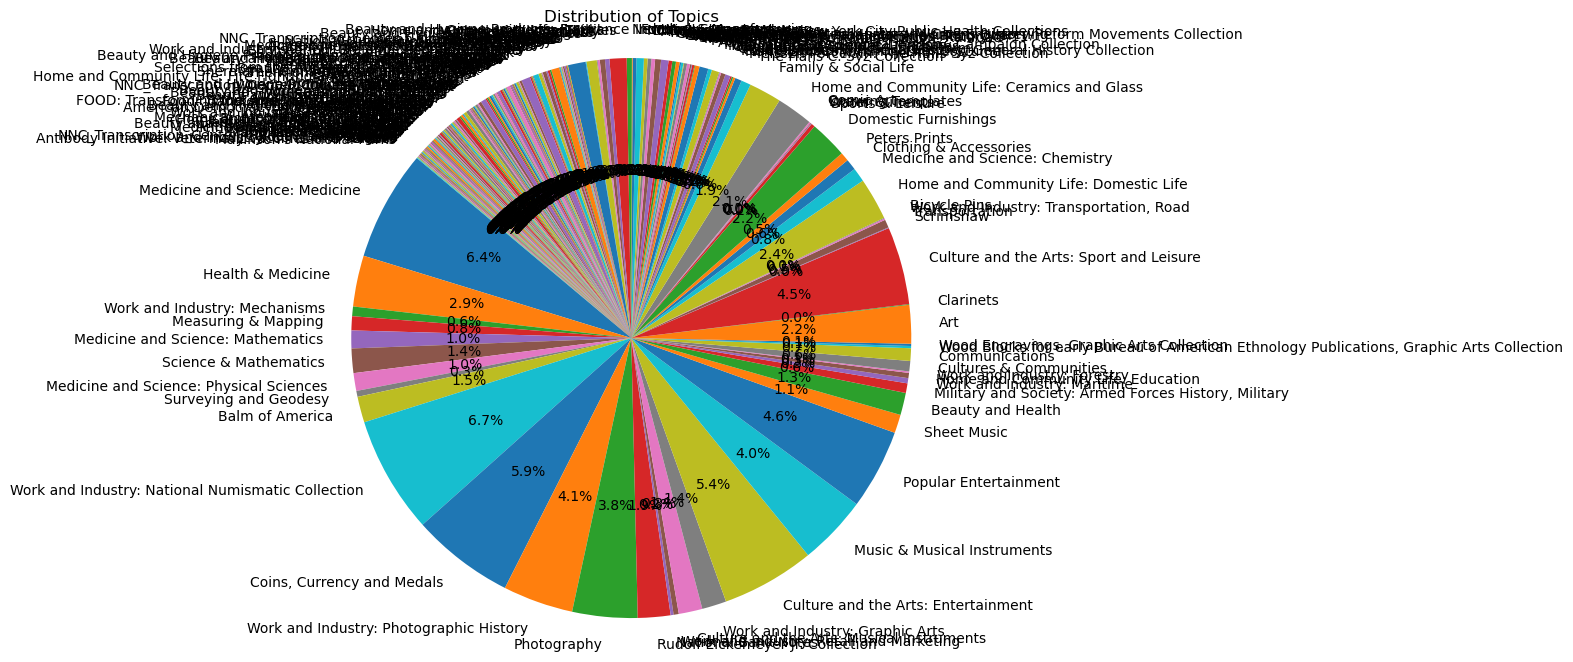

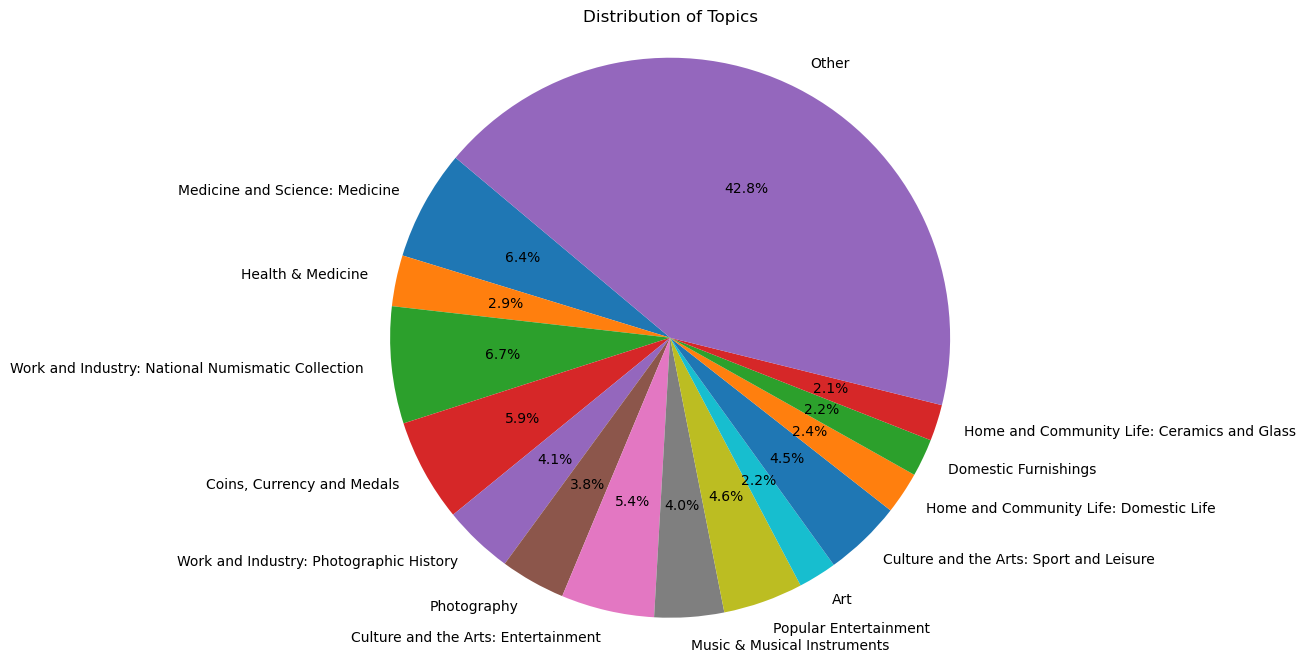

In [6]:
from collections import Counter

import matplotlib.pyplot as plt

# Extract all topics into a single list
all_sets = [set for sublist in df_combined['setName'].dropna() for set in sublist]

# Count the occurrences of each topic
topic_counts = Counter(all_sets)

# Create a pie chart
plt.figure(figsize=(10, 8))
plt.pie(topic_counts.values(), labels=topic_counts.keys(), autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Topics')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
# Filter topics that are 2% or more
threshold = 0.02 * sum(topic_counts.values())
filtered_topic_counts = {topic: count for topic, count in topic_counts.items() if count >= threshold}

# Add "other" category
other_count = sum(count for count in topic_counts.values() if count < threshold)
if other_count > 0:
    filtered_topic_counts['Other'] = other_count

# Create a pie chart with filtered topics
plt.figure(figsize=(10, 8))
plt.pie(filtered_topic_counts.values(), labels=filtered_topic_counts.keys(), autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Topics')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()



# from collections import Counter

# import matplotlib.pyplot as plt

# # Extract all topics into a single list
# all_topics = [topic for sublist in df_combined['topic'].dropna() for topic in sublist]

# # Count the occurrences of each topic
# topic_counts = Counter(all_topics)

# # Create a pie chart
# plt.figure(figsize=(10, 8))
# plt.pie(topic_counts.values(), labels=topic_counts.keys(), autopct='%1.1f%%', startangle=140)
# plt.title('Distribution of Topics')
# plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
# plt.show()


In [8]:
# Filter the DataFrame for rows where 'objectType' contains "pharmaceutical" or "drug"
pharma_drug_df = df_combined[df_combined['objectType'].apply(lambda x: any('pharmaceutical' in item.lower() or 'drug' in item.lower() for item in x))]

# Count the occurrences by date
pharma_drug_counts = pharma_drug_df['date'].value_counts()

# Display the counts
pharma_drug_counts

date
                    27
ca 1935              2
ca 1930              2
after 1927           1
after 1938           1
1969-1975            1
ca 1931              1
After 1915           1
after 1882           1
ca 1930s - 1950s     1
after 1924           1
1940s-1960s          1
ca 1962              1
c. 1976              1
after 1856           1
1930s                1
ca 1940s             1
after 1922           1
ca 1908              1
ca 1943              1
before 1937          1
ca 1909              1
after 1921           1
ca 1955              1
1960's               1
after 1906           1
ca 1951              1
1862-1871            1
ca. 1906             1
ca 1920              1
1978-1982            1
1870-1900            1
Name: count, dtype: int64

In [14]:
import pandas as pd
import json

# Load the JSON data
with open('NMAH_pharma_1.json', 'r') as file:
    data = json.load(file)

# Convert JSON data to DataFrame
df = pd.DataFrame(data)

# Normalize the 'freetext' column to extract the first values
freetext_df = pd.json_normalize(df['freetext'])

# Combine the original DataFrame with the normalized 'freetext' DataFrame
df_pharma = pd.concat([df.drop(columns=['freetext']), freetext_df], axis=1)

# Display the combined DataFrame
df_pharma.head()
# Print the total row count of the combined DataFrame
# print(f"Total row count: {df_combined.shape[0]}")

,id,title,date,guid,name,objectType,physicalDescription,place,setName,topic
0,ld1-1643398775873-1643398783266-1,"Silicea., 12X",1975,http://n2t.net/ark:/65665/ng49ca746a9-ca30-704...,[Boericke & Tafel],"[Homeopathic Preparation, Bottle of, Homeopath...","[inpure flint (overall material), overall: 13....","[United States: Pennsylvania, Philadelphia]",[Medicine and Science: Medicine],NaN
1,ld1-1643399055209-1643399069703-0,"Antiseptic, Hydragyrichloridum corrosivum",,http://n2t.net/ark:/65665/ng49ca746a0-de00-704...,[Bristol-Myers Squibb Company],"[pharmaceutical, Drugs]",[overall: 15.8 cm x 6.59 cm; 6 1/4 in x 2 5/8 ...,NaN,[Medicine and Science: Medicine],NaN
2,ld1-1643399055209-1643399080624-1,"Lorophyn, Suppositories",,http://n2t.net/ark:/65665/ng49ca746a5-66bb-704...,NaN,"[contraceptive, suppositories, ?; Prescription...",[overall: 2 5/8 in x 3 1/4 in x 1 5/8 in; 6.66...,"[United States: New York, Norwich]",[Medicine and Science: Medicine],"[Birth Control/Contraception, Women's Health]"
3,ld1-1643399055209-1643399080585-0,"Pepto-Bismol, 4 Fl Oz",ca 1961,http://n2t.net/ark:/65665/ng49ca746a5-6b5a-704...,[Norwich Pharmacal Company],"[otc preparation, ?; Patent Medicines; Drugs]",[overall: 7 5/8 in x 4 5/8 in x 1 7/8 in; 19.3...,"[United States: New York, Norwich]","[Medicine and Science: Medicine, Balm of America]",NaN
4,ld1-1643399486815-1643399518589-1,Pituitrin (Surgical),,http://n2t.net/ark:/65665/ng49ca746a5-66a9-704...,"[Parke, Davis and Company]","[Pituitrin (Surgical), pharmaceutical, Pituitr...",[overall: 2 in x 3/8 in; 5.08 cm x .9525 cm],"[United States: Michigan, Detroit]",[Medicine and Science: Medicine],NaN


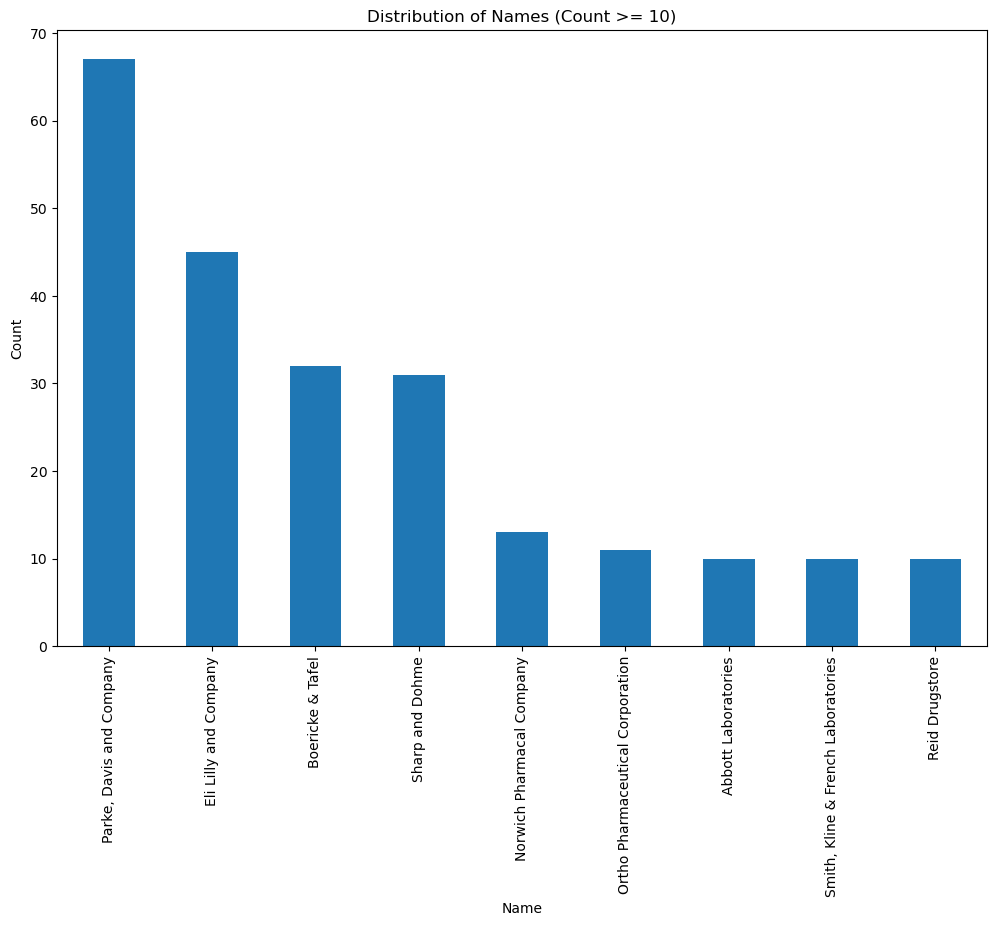

In [16]:
# Filter names with count 10 or more
filtered_name_counts = name_counts[name_counts >= 10]

# Plot the bar chart
plt.figure(figsize=(12, 8))
filtered_name_counts.plot(kind='bar')
plt.title('Distribution of Names (Count >= 10)')
plt.xlabel('Name')
plt.ylabel('Count')
plt.show()

In [2]:
import pandas as pd
import json

# Load the TSV data
df_tsv = pd.read_csv('g_brf_sum_text_2024.tsv', sep='\t')

# Display the head of the DataFrame
df_tsv.head()

,patent_id,summary_text
0,PP35566,Genus and species:Weigela florida.\n\nVariety ...
1,PP35567,Genus and species:Buddleiaxhybrida(Buddleia da...
2,PP35568,Latin name of the genus and species: The Latin...
3,RE49771,FIELD OF THE INVENTION\n\nThe present inventio...
4,RE49772,FIELD OF TECHNOLOGY\n\nThe present disclosure ...
